In [ ]:
# %pip install python-dotenv dashscope requests matplotlib pillow

In [4]:
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv("./env/.env"))

In [16]:
from langchain.prompts import ChatPromptTemplate
from langchain_community.chat_models import ChatTongyi

image_description_prompt = """你是一个精通文字编辑和图片处理的专家，你会根据我给出的文字内容生成一段图片描述，该图片会作为给出的文字内容的特色图片（特色图片featured image代表博客或页面的文字内容，情绪或主题，并在整个网站中使用），要求：
1. 该描述能够帮助AI理解并生成与文字内容相关的图片；
2. 该描述能够概括出文字内容中的主要信息和主题，为了让图片更有创意性，你可适当的增加天马行空的元素和描述；
3. 你会从图片专家的角度思考，描述中尽量包括图片中心主题，环境信息，图片中的物体位置、图片中的物体大小、图片中的物体颜色、图片中的物体形状、图片中的物体材质、图片中的物体风格、图片中的物体数量、图片中的物体关系等等；
4. 同时你还会给出图片艺术风格的描述，具体图片艺术风格你可以根据自己对给出的文字内容的理解自行决定，图片风格你只可以从如下选项中选择：
    - <photography>：摄影。
    - <portrait>：人像写真。
    - <3d cartoon>：3D卡通。
    - <anime>：动画。
    - <oil painting>：油画。
    - <watercolor>：水彩。
    - <sketch>：素描。
    - <chinese painting>：中国画。
    - <flat illustration>：扁平插画。；
5. 你会从图片专家的角度思考，给出一些用于AI生成图片时可以利用的技术参数从而让图片变得更加美观，你可以根据自身对图片以及美观的理解自行选择需要设置的图片技术参数例如近景镜头、半身特写、锐化等等；

文字内容如下：
{text}
"""

text_context = """
# 如何在人工智能领域建立自己的职业生涯
![[Pasted image 20241122173541.png]]
随着 LLM 技术的兴起，日常工作会频繁的碰到 LLM/AI 相关的技术和项目，我所在的 OS Security Team 会研究 AI for System & System for AI 这两个领域，这就被迫需要补充学习 LLM/AI 相关的知识。吴恩达的书[《How to Build Your Career in AI》](https://info.deeplearning.ai/how-to-build-a-career-in-ai-book)，解决了很多学习 LLM/AI 的疑惑，例如：
- LLM/AI 的学习路线的规划是什么样的
- 成为 LLM/AI 工程师我需要学那些东西
- 我要学多少数学才能成为一名 LLM/AI 工程师
- ……

这篇文章想分享吴恩达给予我在学习 AI 这条路上的一些启发和思考。

## AI 学习的关键领域
现如今已经发表的关于 AI 研究的论文，任何人一生能不可能读完。因此在学习时，选择主题至关重要。

### 机器学习基础技能
理解线性回归、逻辑回归、神经网络、决策树、聚类和异常检测等模型很重要。除了特定的模型之外，理解机器学习工作原理的核心概念更为重要，如偏差/方差、成本函数、正则化、优化算法和误差分析。

### 深度学习
深度学习已经是机器学习中非常重要的一部分，以至于没有一定的理解就很难在这个领域取得优异成绩！了解神经网络的基础知识、使它们发挥作用的实际技能（如超参数调整）、卷积网络、序列模型和 transformers 是非常有价值的。

### 与机器学习相关的数学
线性代数（向量、矩阵及其各种操作）以及概率和统计（包括离散和连续概率、标准概率分布、基本规则如独立性和贝叶斯法则，以及假设检验）。此外，探索性数据分析（EDA）——使用可视化和其他方法系统地探索数据集——是一项被低估的技能，它在以数据为中心的 AI 开发中特别有用，其中分析错误和获得见解可以真正帮助推动进展！最后，对微积分的基本直观理解也会有所帮助。

### 软件开发
虽然仅凭机器学习建模技能就能找到工作并做出巨大贡献，但如果你还能编写良好的软件来实现复杂的 AI 系统，你的就业机会将会增加。这些技能包括编程基础、数据结构（尤其是与机器学习相关的，如数据框）、算法（包括与数据库和数据操作相关的算法）、软件设计、熟悉 Python 以及熟悉关键库如 TensorFlow 或 PyTorch 和 scikit-learn。

## 建立学习习惯的方法
BJ Fogg 在他的《Tiny Habits: The Small Changes That Change Everything》中解释说，建立新习惯的最佳方式是从小事做起并取得成功，而不是一开始就定下过高的目标导致失败。例如，与其每天试图锻炼 30 分钟，他建议先设定一个做一次俯卧撑的目标，并坚持去做。

这种方法可能对那些想要花更多时间学习的你们有所帮助。如果你从每天坚持观看，比如说，10 秒的教育视频开始——并且你能够持续这样做——每天学习的习惯就会自然地养成。即使在这 10 秒内你什么都没学到，你也正在建立每天学习一点的习惯。有些日子，也许你会最终学习一个小时或更长时间。

## 数学与 AI
数学是人工智能的基础技能吗？多了解一些数学总是好的！但是要学习的东西太多了，实际上，有必要进行优先排序。以下是如何加强你的数学背景的方法。

为了弄清楚什么是重要的知识，有必要问一问，为了完成你想要做的工作所需的决策，你需要知道什么 —— “为了实现目标，人们需要知道什么？”。

理解你所使用的算法背后的数学通常是有帮助的，因为它使你能够调试它们。但是，有用的知识深度会随着时间而变化。随着机器学习技术的成熟和变得更加可靠和即用，它们需要较少的调试，对涉及的数学有较浅的理解可能就足以使它们工作。

例如，在机器学习的早期，用于求解线性方程组（用于线性回归）的线性代数库还不成熟。我必须了解这些库的工作原理，以便在不同的库之间做出选择并避免数值舍入误差。但随着数值线性代数库的成熟，这一点变得不那么重要了。

深度学习仍然是一项新兴技术，因此当你训练神经网络时，如果优化算法难以收敛，理解梯度下降、动量和 Adam 优化算法背后的数学原理将帮助你做出更好的决策。同样地，如果你的神经网络表现异常——比如，在某些分辨率的图像上预测效果差，而在其他图像上则不然——理解神经网络架构背后的数学原理会使你处于更有利的位置来解决问题。

当然，我也鼓励由好奇心驱动的学习。如果某件事让你感兴趣，不妨去学习它，不管它可能有多么实用！也许这会激发你的创造力或技术突破。

## 识别 AI 的用武之地
### 步骤一，确定一个业务问题（而不是 AI 问题）
找到一个领域专家并询问：“你希望哪些事情能够变得更好？为什么这些事情还没有得到解决？”。例如，如果你想将 AI 应用于气候变化，你可能会发现电网运营商无法准确预测未来风能和太阳能等间歇性能源可能产生的电力。

### 步骤二，头脑风暴 AI 解决方案
不要因为一个想法令人兴奋就立马去执行，有时可能存在一个不需要更多努力就能实现的更好想法。一旦理解了问题，就可以更有效地头脑风暴潜在的解决方案，有时没有好的 AI 解决方案那也没关系。

### 步骤三，评估潜在解决方案的可行性和价值
可以通过查看已发表的论文、竞争对手的做法，或者也许构建一个快速的概念验证实现来确定一种方法在技术上是否可行，也可以通过咨询领域专家来确定其价值。

### 步骤四，确定里程碑
一旦你认为一个项目足够有价值，下一步就是确定要追求的指标。这包括机器学习指标（如准确率）和业务指标（如收入）。机器学习团队通常最擅长优化学习算法的指标。但我们可能需要走出舒适区，提出与用户参与度、收入等相关的业务指标。不幸的是，并不是每个业务问题都能归结为优化测试集的准确率！如果你无法确定合理的里程碑，这可能是一个信号，表明你需要更多地了解这个问题。一个快速的概念验证可以帮助提供缺失的视角。

### 步骤五，为资源制定预算
考虑项目所需的一切，包括数据、人员、时间以及可能需要的其他团队的任何集成或支持。

## 找到与自己匹配的 AI 项目
### 一些有用的原则
- 花一个月时间来决定是否要开展一个只需一周就能完成的项目是不合逻辑的。
- 在你的职业生涯中，你会参与多个项目，因此你将有充足的机会去完善你对什么是有价值的项目的思考。
- 鉴于可能的人工智能项目数量众多，与其采用传统的“准备、瞄准、开火”方法，不如用“准备、开火、瞄准”来加速你的进展：
	- “准备，瞄准，开火”：仔细计划并进行仔细验证。只有在对某个方向有高度信心时才投入和执行。
	- “准备，开火，瞄准”：跳入开发并开始执行。这使您能够快速发现问題并在必要时中途调整方向。

### 如果你没有任何项目想法
1. 加入现有的项目。如果你发现别人有好的想法，可以请求加入他们的项目。
2. 保持阅读并与人交流。每当我花大量时间阅读、上课或与领域专家交谈时，我总会产生新的想法。我相信你也会这样。
3. 专注于一个应用领域。许多研究人员正试图推进基础人工智能技术——比如，发明下一代 transformer 或进一步扩大语言模型的规模。因此，虽然这是一个令人兴奋的方向，但也是非常困难的。但是，机器学习尚未应用的领域是广阔的！如果你的公司或学校关心某个特定的应用，探索机器学习的可能性。这可以让你率先了解一个可能具有创意的应用——一个你可以做出独特工作的地方——而其他人还没有做到这一点。
4. 发展一项副业。即使你有全职工作，一个有趣的项目可能会或不会发展成更大的事业，但可以激发创造力并加强与合作者的关系。只要不与雇主产生冲突，这些项目可以成为通往重大事业的垫脚石。

### 如果你有一些项目想法
1. 这个项目会帮助你技术上成长吗？理想情况下，它应该具有足够的挑战性来提升你的技能，但又不至于太难，让你几乎没有成功的可能。这将使你走上掌握更高技术复杂性的道路。
2. 你有好的队友一起工作吗？如果没有，有可以讨论事情的人吗？我们从周围的人身上学到很多，好的合作者会对你的成长产生巨大影响。
3. 它能成为一块垫脚石吗？如果项目成功，它的技术复杂性和/或业务影响是否会使其成为更大项目的有意义的垫脚石？如果这个项目比你之前参与的项目更大，那么它很可能就是这样的垫脚石。

## 最后
![[Pasted image 20241123205605.png]]
"""


llm_model = "qwen-max"

llm = ChatTongyi(temperature=0.8, model=llm_model)

image_description_template = ChatPromptTemplate.from_template(image_description_prompt)

response = llm.invoke(image_description_template.format_messages(text=text_context))

image_description = response.content

print(response.content)

### 图片描述

**中心主题**：一位年轻的AI工程师站在一台巨大的未来感十足的计算机前，这台计算机屏幕上显示着复杂的神经网络结构图。背景是现代化的城市夜景，高楼大厦灯火辉煌，象征着技术进步与城市发展的紧密联系。

**环境信息**：
- **场景**：现代都市夜晚
- **光源**：来自城市的灯光和计算机屏幕发出的柔和蓝光
- **氛围**：充满科技感且略带神秘色彩

**图片中的物体**：
- **主要人物**（位置：前景中央；大小：占据画面约1/3高度；颜色：穿着深蓝色T恤搭配灰色牛仔裤；形状：站立姿势；材质：衣物为棉质）
- **计算机屏幕**（位置：位于人物右侧；大小：几乎与人物等高；颜色：黑色边框+蓝色界面；形状：矩形；材质：金属+玻璃；内容：动态展示神经网络模型）
- **键盘**（位置：计算机前方；大小：标准尺寸；颜色：黑色；形状：长方形；材质：塑料）

**艺术风格**：<flat illustration> 扁平插画

**技术参数建议**：
- 采用扁平化设计风格，保持线条简洁流畅。
- 色彩以冷色调为主，如蓝色、灰色，营造出科技氛围。
- 通过光影效果突出计算机屏幕作为视觉焦点。
- 人物表情专注而自信，体现出对未来充满期待的态度。
- 增加一些微小但富有创意的细节，比如空中漂浮的数据点或者虚拟助手的形象，增加画面趣味性和科幻感。
- 使用半身特写镜头来强化主体形象，并让观者更加聚焦于角色及其所处的技术环境中。

这样一幅结合了现代都市夜景与先进人工智能技术元素的画面，不仅能够很好地反映文章中关于如何在AI领域建立职业生涯的主题，同时也展现出了一种积极向上、探索未知的精神面貌。


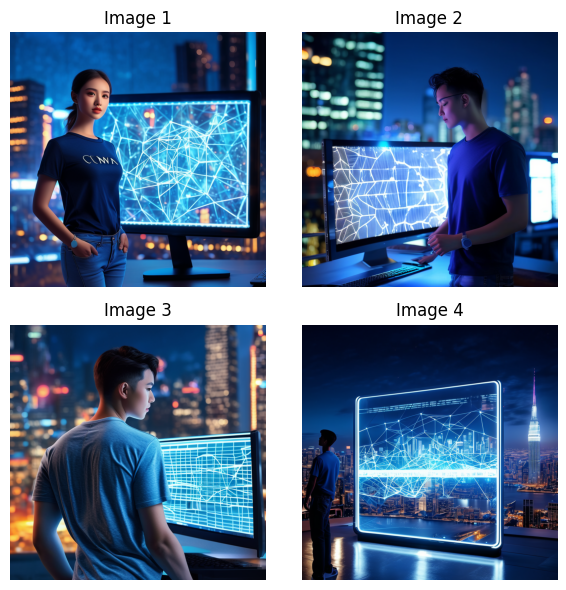

In [17]:
from http import HTTPStatus
import dashscope
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import os

def simple_call():
    urls = []
    prompt = image_description
    rsp = dashscope.ImageSynthesis.call(
        model=dashscope.ImageSynthesis.Models.wanx_v1,
        prompt=prompt,
        n=4,
        size="1024*1024",
        api_key=os.getenv("DASHSCOPE_API_KEY"),
    )
    if rsp.status_code == HTTPStatus.OK:
        # save file to current directory
        for result in rsp.output.results:
            urls.append(result.url)
    else:
        print(
            "Failed, status_code: %s, code: %s, message: %s"
            % (rsp.status_code, rsp.code, rsp.message)
        )

    return urls


def display_images_in_grid(image_urls):
    # 创建2x2的子图布局
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))

    # 扁平化axes数组以便更容易遍历
    axes_flat = axes.flatten()

    # 遍历每个图片URL
    for i, url in enumerate(image_urls):
        try:
            # 从URL获取图片
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))

            # 在对应的子图中显示图片
            axes_flat[i].imshow(img)
            axes_flat[i].axis("off")  # 关闭坐标轴
            axes_flat[i].set_title(f"Image {i+1}")

        except Exception as e:
            print(f"Error loading image {i+1}: {str(e)}")
            axes_flat[i].text(
                0.5, 0.5, f"Error loading\nImage {i+1}", ha="center", va="center"
            )
            axes_flat[i].axis("off")

    # 调整子图之间的间距
    plt.tight_layout()

    # 显示图表
    plt.show()


if __name__ == "__main__":
    image_urls = simple_call()
    display_images_in_grid(image_urls)